In [1]:
!pip install scanpy anndata matplotlib seaborn


In [16]:
import scanpy as sc
import pandas as pd
from scipy.io import mmread
from anndata import AnnData
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read  Normals

In [17]:


X = mmread(r"sngel_cell_data\normal\matrix.mtx.gz").T.tocsr() 
genes = pd.read_csv(r"sngel_cell_data\normal\features.tsv.gz", header=None, sep="\t")
barcodes = pd.read_csv(r"sngel_cell_data\normal\barcodes.tsv.gz", header=None)

normal_data = AnnData(X)
normal_data.var_names = genes[1] 
normal_data.obs_names = barcodes[0]


In [18]:
normal_data.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


Read  Case

In [19]:

X = mmread(r"sngel_cell_data\cancer\matrix.mtx.gz").T.tocsr()  
genes = pd.read_csv(r"sngel_cell_data\cancer\features.tsv.gz", header=None, sep="\t")
barcodes = pd.read_csv(r"sngel_cell_data\cancer\barcodes.tsv.gz", header=None)

cancer_data = AnnData(X)
cancer_data.var_names = genes[1] 
cancer_data.obs_names = barcodes[0]


In [20]:
cancer_data.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


Concatenate Normal and Case

In [21]:

normal_data.var_names_make_unique()

normal_data.obs["condition"] = "normal"
cancer_data.var_names_make_unique() 
cancer_data.obs["condition"] = "cancer"



data = normal_data.concatenate(cancer_data, batch_categories = ["N", "C"])
data

C:\Users\sahar\AppData\Local\Temp\ipykernel_13244\3206179280.py:9: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  data = normal_data.concatenate(cancer_data, batch_categories = ["N", "C"])


AnnData object with n_obs × n_vars = 12816 × 33538
    obs: 'condition', 'batch'

In [22]:
data.obs

,condition,batch
AAACCTGAGACTAGGC-1-N,normal,N
AAACCTGAGGACAGAA-1-N,normal,N
AAACCTGAGGATGTAT-1-N,normal,N
AAACCTGCAAGAGGCT-1-N,normal,N
AAACCTGGTAGCTTGT-1-N,normal,N
...,...,...
TTTGTCATCGAGAACG-1-C,cancer,C
TTTGTCATCGCCAGCA-1-C,cancer,C
TTTGTCATCGGCGCAT-1-C,cancer,C
TTTGTCATCGGTCTAA-1-C,cancer,C


In [23]:
data.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


In [24]:
data.X.shape

(12816, 33538)

Quality Control

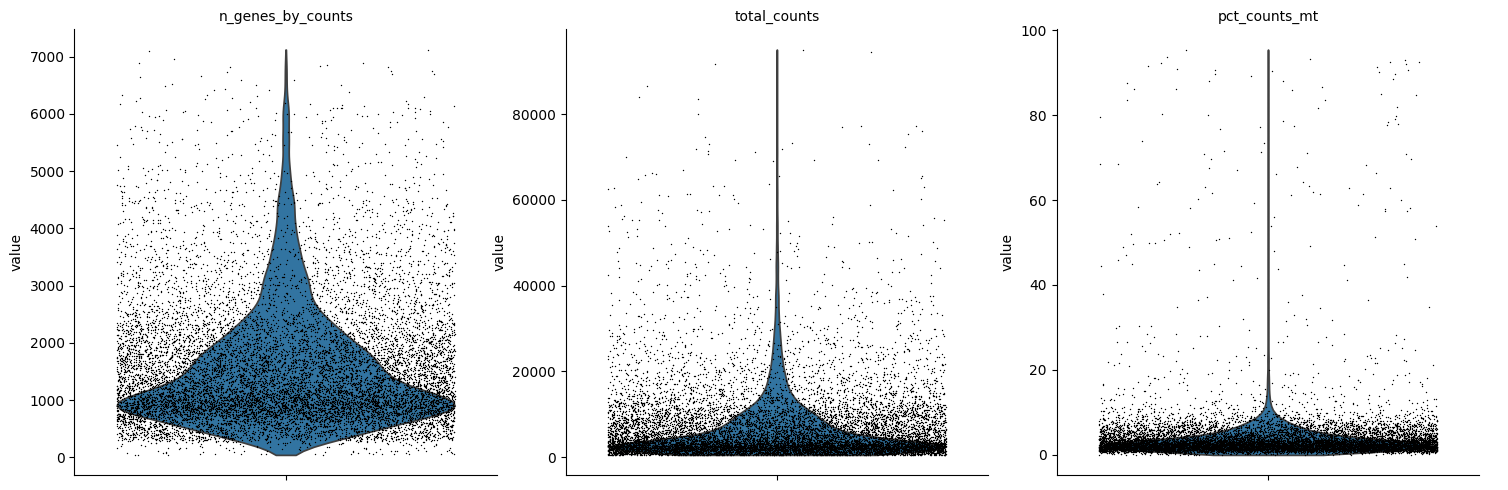

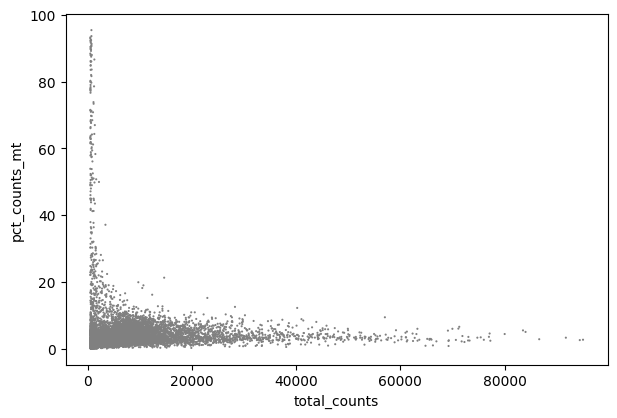

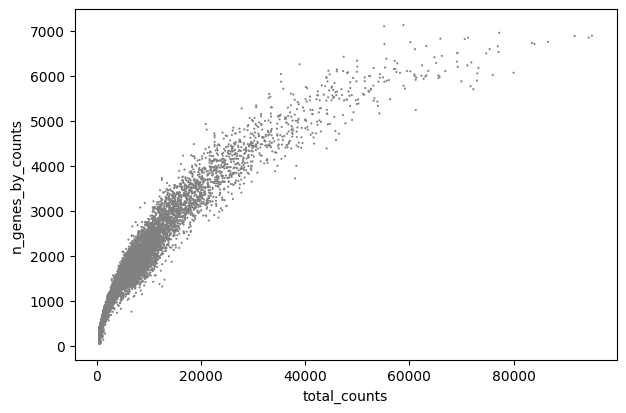

🔍 آمار پس از فیلترگذاری کیفیت (QC):
📌 تعداد سلول‌های باقی‌مانده پس از QC: 12,359
✅ تعداد سلول‌ها مناسب و برای تحلیل‌های آماری قدرتمند کافی است.
📌 تعداد ژن‌های باقی‌مانده پس از فیلتر: 20,712
✅ تعداد ژن‌ها بالا و نشان‌دهنده‌ی پوشش مناسب بیان ژن است.
📈 میانگین تعداد ژن بیان‌شده در هر سلول: 1610.1
✅ مقدار متعادلی از ژن‌های فعال دیده می‌شود.
🧬 میانگین تعداد کل counts در هر سلول: 7030.6
✅ میزان مناسب از transcriptها در سلول‌ها شناسایی شده است.
🔬 میانگین درصد بیان ژن‌های میتوکندریایی: 2.98%
✅ درصد پایین میتوکندری نشان‌دهنده‌ی کیفیت مناسب سلول‌هاست.


In [25]:

initial_cells = data.n_obs
initial_genes = data.n_vars

data.obs['n_genes'] = (data.X > 0).sum(1)

data.obs['n_counts'] = data.X.sum(1)

data.var['mt'] = data.var_names.str.startswith('MT-')

sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], inplace=True)

sc.pl.violin(data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(data, x='total_counts', y='n_genes_by_counts')

sc.pp.filter_cells(data, min_genes=200)      
sc.pp.filter_genes(data, min_cells=3)        

data = data[data.obs.pct_counts_mt < 10, :]

print("🔍 آمار پس از فیلترگذاری کیفیت (QC):")

print(f"📌 تعداد سلول‌های باقی‌مانده پس از QC: {data.n_obs:,}")
if data.n_obs < 1000:
    print("⚠️ تعداد سلول‌ها نسبتاً کم است؛ ممکن است نیاز به داده بیشتر یا بررسی علت حذف بالا داشته باشیم.")
elif data.n_obs > 10000:
    print("✅ تعداد سلول‌ها مناسب و برای تحلیل‌های آماری قدرتمند کافی است.")

print(f"📌 تعداد ژن‌های باقی‌مانده پس از فیلتر: {data.n_vars:,}")
if data.n_vars < 5000:
    print("⚠️ تعداد ژن‌ها کم است؛ احتمالاً فیلتر خیلی سخت‌گیرانه بوده یا داده کم‌تنوع است.")
elif data.n_vars > 15000:
    print("✅ تعداد ژن‌ها بالا و نشان‌دهنده‌ی پوشش مناسب بیان ژن است.")

mean_genes = data.obs['n_genes_by_counts'].mean()
print(f"📈 میانگین تعداد ژن بیان‌شده در هر سلول: {mean_genes:.1f}")
if mean_genes < 1000:
    print("⚠️ ممکن است بخشی از سلول‌ها آسیب‌دیده یا ناقص باشند.")
elif mean_genes > 3000:
    print("ℹ️ مقدار بالا ممکن است به دلیل doublet یا سلول‌های ترکیبی باشد.")
else:
    print("✅ مقدار متعادلی از ژن‌های فعال دیده می‌شود.")

mean_counts = data.obs['total_counts'].mean()
print(f"🧬 میانگین تعداد کل counts در هر سلول: {mean_counts:.1f}")
if mean_counts < 2000:
    print("⚠️ مقدار پایین ممکن است نشان‌دهنده sequencing کم‌عمق یا سلول‌های ضعیف باشد.")
else:
    print("✅ میزان مناسب از transcriptها در سلول‌ها شناسایی شده است.")

mean_mt = data.obs['pct_counts_mt'].mean()
print(f"🔬 میانگین درصد بیان ژن‌های میتوکندریایی: {mean_mt:.2f}%")
if mean_mt > 10:
    print("⚠️ میزان میتوکندری بالاست؛ احتمال وجود سلول‌های مرده یا تحت استرس وجود دارد.")
elif mean_mt < 5:
    print("✅ درصد پایین میتوکندری نشان‌دهنده‌ی کیفیت مناسب سلول‌هاست.")
else:
    print("ℹ️ درصد متوسطی از میتوکندری مشاهده می‌شود که قابل قبول است.")



In [26]:
final_cells = data.n_obs
final_genes = data.n_vars

removed_cells = initial_cells - final_cells
removed_genes = initial_genes - final_genes
cell_removal_percent = (removed_cells / initial_cells) * 100
gene_removal_percent = (removed_genes / initial_genes) * 100

print("✅ تغییرات پس از QC:")
print(f"سلول‌ها قبل: {initial_cells}   بعد: {final_cells}   حذف شده: {removed_cells}")
print(f"ژن‌ها قبل:   {initial_genes}   بعد: {final_genes}   حذف شده: {removed_genes}")

print("\n🧠 تحلیل:")

if cell_removal_percent < 5:
    print(f"از {initial_cells:,} سلول، تنها {removed_cells:,} ({cell_removal_percent:.1f}%) حذف شدند؛ "
          f"نشان‌دهنده‌ی کیفیت بسیار خوب داده‌هاست.")
elif cell_removal_percent < 15:
    print(f"{removed_cells:,} سلول ({cell_removal_percent:.1f}%) حذف شدند؛ این میزان حذف برای scRNA-seq طبیعی است.")
else:
    print(f"⚠️ هشدار: {removed_cells:,} سلول (حدود {cell_removal_percent:.1f}%) حذف شدند. احتمال وجود نویز یا آلودگی بالا هست.")

if gene_removal_percent < 20:
    print(f"{removed_genes:,} ژن حذف شدند ({gene_removal_percent:.1f}%)؛ حذف ژن‌های کم‌بیان در این سطح بسیار خوب است.")
elif gene_removal_percent < 50:
    print(f"{removed_genes:,} ژن ({gene_removal_percent:.1f}%) حذف شدند؛ این معمولاً به خاطر ژن‌های کم‌بیان است.")
else:
    print(f"⚠️ هشدار: بیش از نیمی از ژن‌ها ({removed_genes:,} ژن، {gene_removal_percent:.1f}%) حذف شدند. "
          f"شاید پارامترهای فیلتر بیش از حد سخت‌گیرانه بوده باشند.")

✅ تغییرات پس از QC:
سلول‌ها قبل: 12816   بعد: 12359   حذف شده: 457
ژن‌ها قبل:   33538   بعد: 20712   حذف شده: 12826

🧠 تحلیل:
از 12,816 سلول، تنها 457 (3.6%) حذف شدند؛ نشان‌دهنده‌ی کیفیت بسیار خوب داده‌هاست.
12,826 ژن (38.2%) حذف شدند؛ این معمولاً به خاطر ژن‌های کم‌بیان است.


In [27]:
data.obs

,condition,batch,n_genes,n_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGACTAGGC-1-N,normal,N,1359,3587,1359,7.215240,3587,8.185350,36.437134,50.683022,61.834402,76.052411,287,5.662960,8.001115
AAACCTGAGGACAGAA-1-N,normal,N,510,1003,510,6.236370,1003,6.911747,39.481555,53.738784,69.092722,99.002991,4,1.609438,0.398804
AAACCTGAGGATGTAT-1-N,normal,N,1893,7536,1893,7.546446,7536,8.927580,37.460191,51.167728,63.468684,77.760085,173,5.159055,2.295648
AAACCTGCAAGAGGCT-1-N,normal,N,2595,10366,2595,7.861727,10366,9.246383,31.207795,45.388771,59.097048,73.133320,408,6.013715,3.935944
AAACCTGGTAGCTTGT-1-N,normal,N,734,1628,734,6.599870,1628,7.395722,37.837838,51.965602,66.400491,85.626536,43,3.784190,2.641278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGAGAACG-1-C,cancer,C,1357,5598,1357,7.213768,5598,8.630343,43.408360,60.432297,71.882815,84.619507,220,5.398163,3.929975
TTTGTCATCGCCAGCA-1-C,cancer,C,2486,12103,2486,7.818832,12103,9.401291,36.610758,53.044700,64.950839,77.460134,580,6.364751,4.792200
TTTGTCATCGGCGCAT-1-C,cancer,C,745,1665,745,6.614726,1665,7.418181,36.096096,49.609610,64.024024,85.285285,18,2.944439,1.081081
TTTGTCATCGGTCTAA-1-C,cancer,C,1148,3618,1148,7.046647,3618,8.193953,45.411830,55.472637,66.583748,82.089552,53,3.988984,1.464898


Normalize

In [28]:
sc.pp.normalize_total(data, target_sum=1e4)

sc.pp.log1p(data)

sc.pp.highly_variable_genes(data, n_top_genes=2000, subset=True)

sc.pp.scale(data, max_value=10)


c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCA

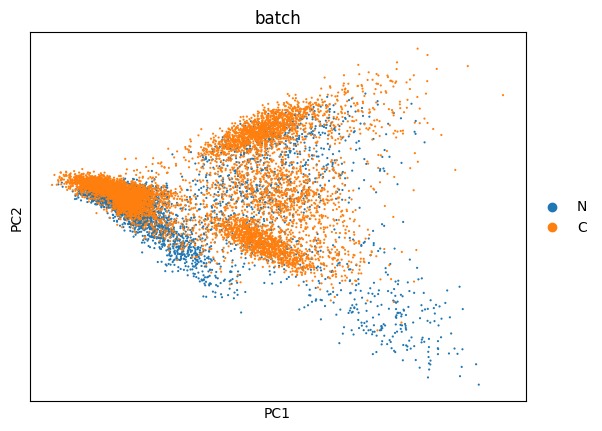

In [29]:
sc.tl.pca(data, svd_solver='arpack' , n_comps=30)
sc.pl.pca(data, color='batch')  


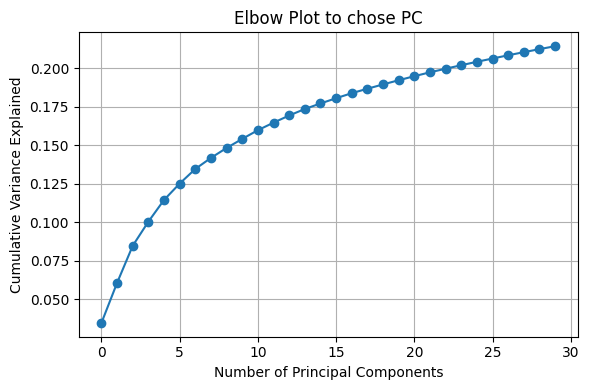

📌 تحلیل Elbow Plot:
این نمودار نشان می‌دهد که با افزایش تعداد مؤلفه‌های اصلی، چه میزان از واریانس کل داده پوشش داده می‌شود.
معمولاً نقطه‌ای که منحنی صاف می‌شود (نقطه زانو)، بهترین انتخاب برای تعداد PC است.
در بیشتر تحلیل‌ها، اگر مثلاً با 20 یا 30 PC حدود 80 تا 90 درصد واریانس پوشش داده شود، آن تعداد کافی است.
✔️ در ادامه می‌تونی بررسی کنی که مثلاً تا PC=30 چند درصد از واریانس پوشش داده شده:


In [30]:


explained_variance = data.uns['pca']['variance_ratio']

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Elbow Plot to chose PC')
plt.grid(True)
plt.tight_layout()
plt.show()
print("📌 تحلیل Elbow Plot:")
print("این نمودار نشان می‌دهد که با افزایش تعداد مؤلفه‌های اصلی، چه میزان از واریانس کل داده پوشش داده می‌شود.")
print("معمولاً نقطه‌ای که منحنی صاف می‌شود (نقطه زانو)، بهترین انتخاب برای تعداد PC است.")
print("در بیشتر تحلیل‌ها، اگر مثلاً با 20 یا 30 PC حدود 80 تا 90 درصد واریانس پوشش داده شود، آن تعداد کافی است.")
print("✔️ در ادامه می‌تونی بررسی کنی که مثلاً تا PC=30 چند درصد از واریانس پوشش داده شده:")

UMAP و Neighborhood Graph

c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


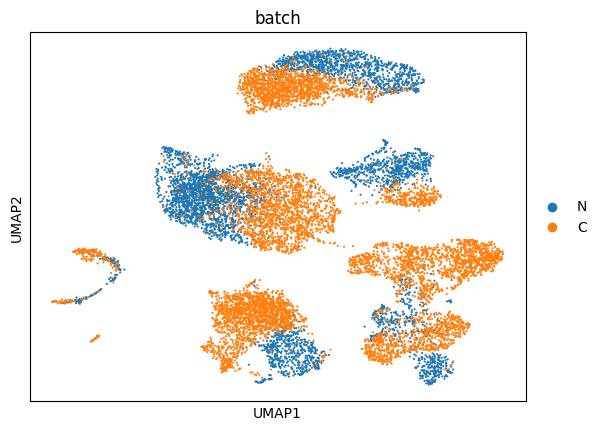

In [31]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=30)
sc.tl.umap(data)
sc.pl.umap(data, color='batch')  


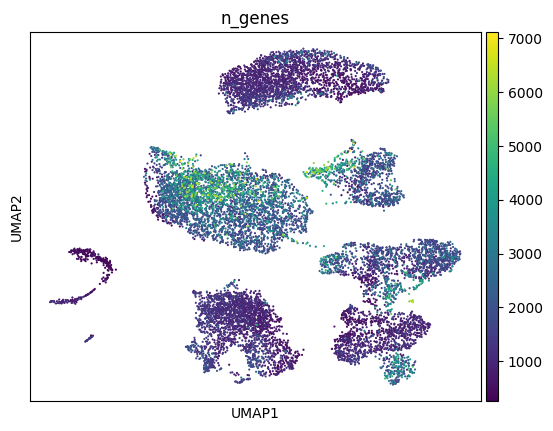

In [32]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=30)
sc.tl.umap(data)
sc.pl.umap(data, color='n_genes')  

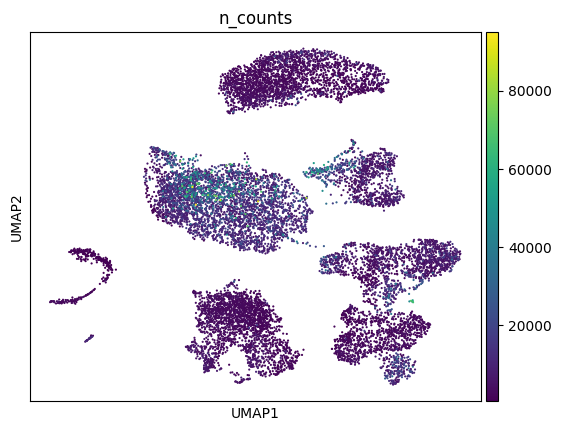

In [33]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=30)
sc.tl.umap(data)
sc.pl.umap(data, color='n_counts')  

DEG

c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


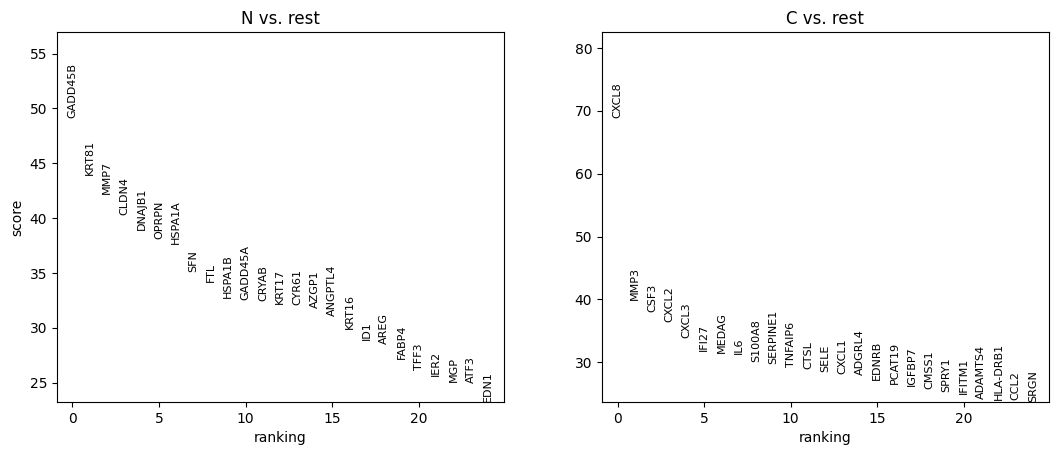

In [34]:
sc.tl.rank_genes_groups(data, groupby='batch', method='t-test')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)


c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


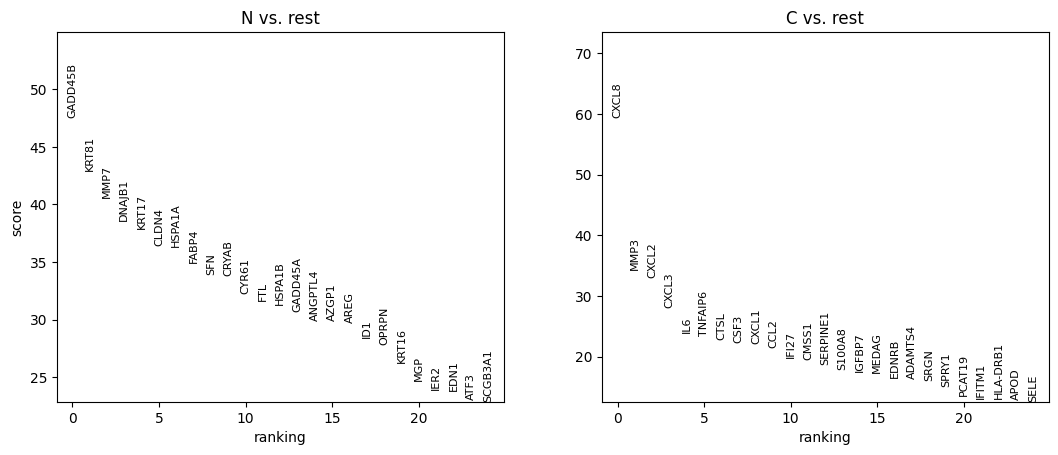

In [35]:
sc.tl.rank_genes_groups(data, groupby='batch', method='wilcoxon')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)


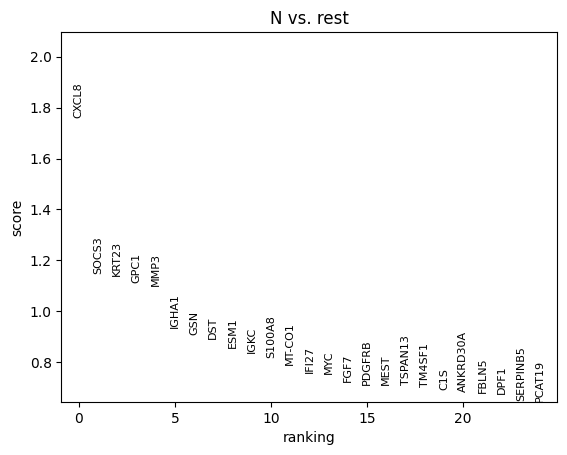

In [36]:
sc.tl.rank_genes_groups(data, groupby='batch', method='logreg')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)
